# Data Analysis with INE

## Meta-info sobre os principais indicadores

In [5]:
from smi import get_metainfo_df

df = get_metainfo_df().sort_values(ascending=False, by=["last_update"])
df

,varcd,title,last_update,geo_lastlevel,last_period_available,periodicity,update_type
162,0012097,Fogos licenciados (N.º) em construções novas p...,2024-12-09,NUTS III,S3A202410,Mensal,A
161,0012096,Edifícios licenciados (N.º),2024-12-09,NUTS III,S3A202410,Mensal,A
75,0007154,Tonelada-quilómetro (tkm) dos Veículos pesados...,2024-12-06,Continente,S5A20243,Trimestral,A
98,0011751,Índice de custo de construção de habitação nov...,2024-12-04,Portugal,S3A202410,Mensal,A
134,0011748,Índice de custo de construção de habitação nov...,2024-12-04,Portugal,S3A202410,Mensal,A
...,...,...,...,...,...,...,...
239,0002843,Unidade de trabalho ano médio por 100 hectares...,2021-03-31,NUTS II,S7A2019,Não periódica,D
160,0000026,Unidade de trabalho ano médio por exploração a...,2021-03-31,NUTS II,S7A2019,Não periódica,D
282,0000035,População agrícola familiar (N.º),2021-03-31,NUTS II,S7A2019,Não periódica,D
227,0000251,Superfície agrícola utilizada (ha),2021-03-31,NUTS II,S7A2019,Não periódica,D


## INE API

```
Caro/a Utilizador/a,
Francisco Mesquita

Agradecemos o seu pedido n.º PED-684641526.

No seguimento do esclarecimento efetuado, informamos:

Com a sinalética <*> na dim2 exemplo: Dim2=<*>??????? , retorna o DataSet com todos os dados que estejam incluídos naquela geografia indicada.

Aproveito para adicionar um esclarecimento que pode ser útil.

Caso pretenda mais que um período de cada vez. Usando para isso o separador "," exemplo: Dim1=S7A2021,S7A2021 ou todos os disponíveis Dim1=T

https://www.ine.pt/ine/json_indicador/pindica.jsp?op=2&varcd=0012757&Dim1=S7A2021,S7A2022&Dim2=<*>2004203&lang=PT

https://www.ine.pt/ine/json_indicador/pindica.jsp?op=2&varcd=0012757&Dim1=T&Dim2=<*>2004203&lang=PT

Colocamo-nos ao V. dispor para eventuais esclarecimentos.
Com os nossos cumprimentos, 

Apoio ao Utilizador

```

In [43]:
import pandas as pd
import requests
query_indicador_base = f"https://www.ine.pt/ine/json_indicador/pindica.jsp?op=2"
query_meta_base = f"https://www.ine.pt/ine/json_indicador/pindicaMeta.jsp?"
SPATIAL = "<*>200"  # Acores, todas
LANG = "PT"
# eg
# f"{query_meta_base}varcd={varcd_cod}&lang={lang}"

## Rendimento mediano na RAA

### Fetch API data

In [ ]:
varcd_cod = "0012757"  # rendimento mediano
temporal_rendimento = "S7A2022"


query_rendimento_mediano = f"{query_indicador_base}&varcd={varcd_cod}&Dim1={temporal_rendimento}&Dim2={SPATIAL}&lang={LANG}"


raw_data_rendimento_mediano_azore_2022 = requests.get(query_rendimento_mediano)
df_rendimento = pd.json_normalize(
    raw_data_rendimento_mediano_azore_2022.json()[0]["Dados"]["2022"]
)
df_rendimento

,geocod,geodsg,ind_string,valor,sinal_conv,sinal_conv_desc
0,200420602,Ponta Garça,7 789,7789,NaN,NaN
1,2004202,Nordeste,8 604,8604,NaN,NaN
2,200420508,Rabo de Peixe,8 704,8704,NaN,NaN
3,2004206,Vila Franca do Campo,8 827,8827,NaN,NaN
4,2004204,Povoação,8 903,8903,NaN,NaN
...,...,...,...,...,...,...
171,200480202,Cedros,-,NaN,-,Dado nulo ou não aplicável
172,200480203,Ponta Delgada,-,NaN,-,Dado nulo ou não aplicável
173,200480204,Santa Cruz das Flores,-,NaN,-,Dado nulo ou não aplicável
174,2004901,Corvo,-,NaN,-,Dado nulo ou não aplicável


### Clean-up

In [46]:
df_rendimento.rename(columns={"valor": "rendimento_mediano"}, inplace=True)
df_rendimento.drop(["ind_string","sinal_conv","sinal_conv_desc"], axis=1, inplace=True)
df_rendimento[["rendimento_mediano"]] = df_rendimento[["rendimento_mediano"]].apply(
    pd.to_numeric, errors="coerce"
)
df_rendimento.sort_values(by=["rendimento_mediano"], inplace=True)
df_rendimento.dropna(inplace=True)

### Inspect Rendimento DF

In [49]:
df_rendimento

,geocod,geodsg,rendimento_mediano
0,200420602,Ponta Garça,7789.0
1,2004202,Nordeste,8604.0
2,200420508,Rabo de Peixe,8704.0
3,2004206,Vila Franca do Campo,8827.0
4,2004204,Povoação,8903.0
5,2004501,Calheta (R.A.A.),9802.0
6,200420104,Lagoa (Santa Cruz),9847.0
7,2004205,Ribeira Grande,10059.0
8,2004201,Lagoa (R.A.A.),10148.0
9,2004401,Santa Cruz da Graciosa,10157.0


## População

In [ ]:
varcod_pop_residente = "0012276"  # "0012295"
temporal_pop = "S7A2021"

query_pop = f"{query_indicador_base}&varcd={varcod_pop_residente}&Dim1={temporal_pop}&Dim2={SPATIAL}&Dim3=T&Dim4=T&lang={LANG}"
raw_data_pop = requests.get(query_pop)


df_pop = pd.json_normalize(raw_data_pop.json()[0]["Dados"]["2021"])
df_pop.rename(columns={"valor": "pop_residente"}, inplace=True)
df_pop["geocod"] = "200" + df_pop["geocod"]
df_pop

,geocod,geodsg,dim_3,dim_3_t,dim_4,dim_4_t,ind_string,pop_residente
0,200480107,Mosteiro,T,HM,T,Total,19,19
1,200480102,Fajãzinha,T,HM,T,Total,71,71
2,200480104,Lajedo,T,HM,T,Total,75,75
3,200480201,Caveira,T,HM,T,Total,76,76
4,200480202,Cedros,T,HM,T,Total,112,112
...,...,...,...,...,...,...,...,...
171,2004302,Vila da Praia da Vitória,T,HM,T,Total,19 463,19463
172,2004205,Ribeira Grande,T,HM,T,Total,31 388,31388
173,2004301,Angra do Heroísmo,T,HM,T,Total,33 771,33771
174,2004203,Ponta Delgada,T,HM,T,Total,67 229,67229


## RSI

In [44]:
varcod_rsi = "0008339"

temporal_rsi = "S7A2022"
query_rsi = f"{query_indicador_base}&varcd={varcod_rsi}&Dim1={temporal_rsi}&Dim2={SPATIAL}&lang={LANG}"
r_dados_rsi = requests.get(query_rsi)
df_rsi = pd.json_normalize(r_dados_rsi.json()[0]["Dados"]["2022"])
df_rsi.rename(columns={"valor": "pop_rsi_permilagem"}, inplace=True)

## Join data

In [47]:
df_ = pd.merge(
    df_rendimento[["geocod", "geodsg", "rendimento_mediano"]],
    df_pop[["geocod", "pop_residente"]],
    on="geocod",
    how="inner",
)
df = pd.merge(
    df_[["geocod", "geodsg", "rendimento_mediano", "pop_residente"]],
    df_rsi[["geocod", "pop_rsi_permilagem"]],
    on="geocod",
    how="inner",
)
df[["rendimento_mediano", "pop_residente", "pop_rsi_permilagem"]] = df[
    ["rendimento_mediano", "pop_residente", "pop_rsi_permilagem"]
].apply(pd.to_numeric, errors="coerce")
df.dropna()

,geocod,geodsg,rendimento_mediano,pop_residente,pop_rsi_permilagem
0,2004202,Nordeste,8604.0,4368,92.54
1,2004206,Vila Franca do Campo,8827.0,10323,63.05
2,2004204,Povoação,8903.0,5791,84.44
3,2004501,Calheta (R.A.A.),9802.0,3437,12.98
4,2004205,Ribeira Grande,10059.0,31388,157.10
5,2004201,Lagoa (R.A.A.),10148.0,14189,90.10
6,2004401,Santa Cruz da Graciosa,10157.0,4090,58.71
7,2004601,Lajes do Pico,10200.0,4340,11.94
8,2004502,Velas,10403.0,4936,10.64
9,2004603,São Roque do Pico,10526.0,3220,13.10


## Plot

Text(0.5, 1.0, 'pop_residente as bubble size')

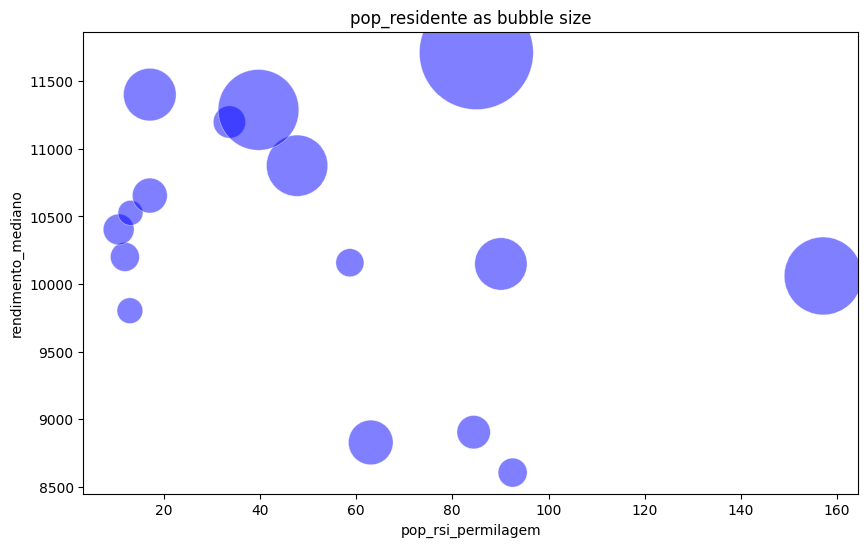

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6)) 
plt.scatter(
    df["pop_rsi_permilagem"],
    df["rendimento_mediano"],
    s=df["pop_residente"] / 10,
    alpha=0.5,
    color="blue",
    edgecolors="w",
    linewidth=0.5,
)

plt.xlabel("pop_rsi_permilagem")
plt.ylabel("rendimento_mediano")
plt.title("pop_residente as bubble size")